<div class="alert alert-block alert-success">
    <h1>Portfolio Project # 3</h1>
    <h2>Data Cleaning Tech Employee Survey Responses</h2>
    <h3>Coded by: Ariba Khan</h3>
</div>

**Link:** https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

This notebook focuses on cleaning and processing survey data collected in 2014 to measure attitudes toward mental health and the frequency of mental health disorders in the tech workplace. The original dataset is sourced from Open Sourcing Mental Illness and contains a variety of responses from tech employees regarding their experiences and perceptions related to mental health.

### Dataset Description

The dataset includes the following features:

- **Timestamp**
- **Age**
- **Gender**
- **Country**
- **State:** If you live in the United States, which state or territory do you live in?
- **Self_Employed:** Are you self-employed?
- **Family_History:** Do you have a family history of mental illness?
- **Treatment:** Have you sought treatment for a mental health condition?
- **Work_Interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **No_Employees:** How many employees does your company or organization have?
- **Remote_Work:** Do you work remotely (outside of an office) at least 50% of the time?
- **Tech_Company:** Is your employer primarily a tech company/organization?
- **Benefits:** Does your employer provide mental health benefits?
- **Care_Options:** Do you know the options for mental health care your employer provides?
- **Wellness_Program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **Seek_Help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **Anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **Leave:** How easy is it for you to take medical leave for a mental health condition?
- **Mental_Health_Consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
- **Phys_Health_Consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
- **Coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
- **Supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **Mental_Health_Interview:** Would you bring up a mental health issue with a potential employer in an interview?
- **Phys_Health_Interview:** Would you bring up a physical health issue with a potential employer in an interview?
- **Mental_vs_Physical:** Do you feel that your employer takes mental health as seriously as physical health?
- **Obs_Consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **Comments:** Any additional notes or comments


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # to view all columns of datasets when displayed
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('survey.csv')

In [3]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.isnull().sum() # missing values in each variable

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
data.isnull().sum().sum() # total count of missing instances

1892

In [7]:
valcheck_cols = data.columns.tolist()
remove_cols = ['Timestamp', 'Age', 'state', 'comments']

for col in remove_cols:
    if col in valcheck_cols:
        valcheck_cols.remove(col)
        
print(valcheck_cols)

['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [8]:
for col in valcheck_cols:
    print(f"Value counts for {col}:")
    print("-" * 50)
    print(data[col].value_counts())
    print("\n")

Value counts for Gender:
--------------------------------------------------
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1

In [9]:
# 25-Jun > 6-25
# 5-Jan > 1-5

# make the rest of the adjustments accordingly

In [10]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [11]:
## correcting column names

correct_cols = {'Timestamp': 'timestamp',
               'Age': 'age',
               'Gender': 'gender',
               'Country': 'country'}

data.rename(columns = correct_cols, inplace = True)
data.head(3) # viewing changes

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [12]:
## storing comments separately
# first we'll store the rows with comments separately

comments_df = data[data['comments'].notnull()]
comments_df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
13,8/27/2014 11:33,36,Male,United States,CT,NaN,Yes,No,Never,500-1000,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
15,8/27/2014 11:34,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,No,Yes,Yes,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
16,8/27/2014 11:34,23,Male,United Kingdom,NaN,NaN,No,Yes,Sometimes,26-100,Yes,Yes,Don't know,No,Don't know,Don't know,Don't know,Very easy,Maybe,No,Some of them,No,Maybe,Maybe,No,No,My company does provide healthcare but not to ...
24,8/27/2014 11:36,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,No,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,8/27/2014 11:37,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,No,No,Yes,Yes,No,Don't know,No,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...


In [13]:
# now we'll drop the comments column from our original dataframe

df = data.copy()
df.drop("comments", axis = 1, inplace = True)
df.head(3) # viewing changes

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No


In [14]:
## extracting month and year from 'timestamp' column

df['timestamp'] = pd.to_datetime(df['timestamp']) # converting to datetime format
df['month'] = df['timestamp'].dt.strftime('%B') # extracting month
df['year'] = df['timestamp'].dt.year # extracting year

df[['timestamp', 'month', 'year']].head() # viewing changes

,timestamp,month,year
0,2014-08-27 11:29:00,August,2014
1,2014-08-27 11:29:00,August,2014
2,2014-08-27 11:29:00,August,2014
3,2014-08-27 11:29:00,August,2014
4,2014-08-27 11:30:00,August,2014


In [15]:
# checking for unique values of the new 'month' and 'year' cols

df['month'].value_counts()

month
August       1138
September      49
February       48
November        5
April           5
May             5
October         3
December        2
July            2
January         1
June            1
Name: count, dtype: int64

In [16]:
df['year'].value_counts()

year
2014    1190
2015      68
2016       1
Name: count, dtype: int64

In [17]:
# dropping 'timestamp' col

df.drop("timestamp", axis = 1, inplace = True)
df.head(3) # viewing changes

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year
0,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,August,2014
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,August,2014
2,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,August,2014


In [18]:
## treating missing values in 'state' col
# data integrity check loop

for idx, row in df.iterrows():
    if pd.isnull(row['state']) and row['country'] != 'United States':
        df.loc[idx, 'state'] = 'Non-USA Residency'
    elif row['country'] != 'United States' and pd.notnull(row['state']):
        print(f"Row index {idx} has a non-USA country ({row['country']}) and a non-null state ({row['state']}).")

Row index 319 has a non-USA country (Latvia) and a non-null state (NY).
Row index 488 has a non-USA country (Israel) and a non-null state (MD).
Row index 989 has a non-USA country (Bahamas, The) and a non-null state (IL).
Row index 1179 has a non-USA country (Bulgaria) and a non-null state (UT).


In [19]:
df['state'].isnull().sum()

11

In [20]:
df[df['state'].isnull()]

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year
52,31,M,United States,NaN,No,No,No,NaN,100-500,Yes,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,August,2014
294,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,No,Yes,Yes,Not sure,Don't know,Don't know,Don't know,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,August,2014
367,36,Male,United States,NaN,No,Yes,Yes,Often,100-500,No,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,August,2014
525,41,Female,United States,NaN,No,Yes,Yes,Rarely,500-1000,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No,August,2014
574,50,Male,United States,NaN,No,No,No,Never,26-100,Yes,Yes,No,Yes,No,No,Don't know,Don't know,No,No,No,No,No,Maybe,No,No,August,2014
596,24,Female,United States,NaN,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Not sure,No,No,Don't know,Somewhat difficult,Yes,Maybe,No,No,No,No,No,Yes,August,2014
638,35,Male,United States,NaN,Yes,No,No,NaN,5-Jan,Yes,Yes,Yes,Not sure,No,No,Yes,Very easy,No,No,Some of them,Yes,No,No,Yes,No,August,2014
817,44,male,United States,NaN,Yes,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,No,No,No,Very easy,Yes,Yes,Some of them,No,No,No,Yes,No,August,2014
854,31,Male,United States,NaN,No,Yes,No,NaN,25-Jun,No,Yes,Don't know,Not sure,No,No,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,August,2014
926,43,M,United States,NaN,No,Yes,No,Sometimes,500-1000,No,No,Yes,Not sure,No,Don't know,Don't know,Don't know,Maybe,No,No,Some of them,No,Maybe,No,No,August,2014


In [21]:
# dropping remaining missing values

df.dropna(subset = ['state'], inplace = True)

In [22]:
## correcting odd values in 'no_employees'

df['no_employees'].replace({'25-Jun': '6-25',
                            '5-Jan': '1-5',
                            '100-500': '101-500',
                            '500-1000': '501-1000'}, inplace = True)

In [23]:
df['no_employees'].value_counts() # viewing changes

no_employees
6-25              289
26-100            287
More than 1000    281
101-500           173
1-5               160
501-1000           58
Name: count, dtype: int64

In [24]:
## treating 'gender' values

# viewing unique values once more
df['gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [25]:
# correct options: Male, Female, Transgender Male, Transgender Female, Non-Binary, Agender

correct_gender = {'Male': ['M', 'male', 'm', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man'],
                'Female': ['female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail'],
                'Transgender Female': ['Trans-female', 'Trans woman', 'Female (trans)'],
                'Non-Binary': ['Male-ish', 'something kinda male?', 'queer/she/they', 'non-binary', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Guy (-ish) ^_^', 'male leaning androgynous', 'queer', 'ostensibly male, unsure what that really means'],
                'Agender': ['Nah', 'Agender', 'Neuter']}

# reversing the dict
mapping = {incorrect: correct for correct, incorrect_values in correct_gender.items() for incorrect in incorrect_values}

# mapping changes
df['gender'] = df['gender'].replace(mapping)

In [26]:
# dropping odd values

drop_gender = ['A little about you', 'p']
df = df[~df['gender'].isin(drop_gender)]

In [27]:
df['gender'].value_counts()

gender
Male                  981
Female                245
Non-Binary             13
Transgender Female      4
Agender                 3
Name: count, dtype: int64

In [28]:
## treating remaining missing values
# 'self_employed'

df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [29]:
# making the assumption that null values = No

df['self_employed'].fillna('No', inplace = True)

In [30]:
df['self_employed'].unique() # viewing changes

array(['No', 'Yes'], dtype=object)

In [31]:
# 'work_interfere'

df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [32]:
# making the assumption that null values = Never

df['work_interfere'].fillna('Never', inplace = True)

In [33]:
df['work_interfere'].unique() # viewing changes

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [34]:
## checking all changes

df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,August,2014
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,August,2014
2,32,Male,Canada,Non-USA Residency,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,August,2014
3,31,Male,United Kingdom,Non-USA Residency,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,August,2014
4,31,Male,United States,TX,No,No,No,Never,101-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,August,2014


<Figure size 1200x500 with 0 Axes>

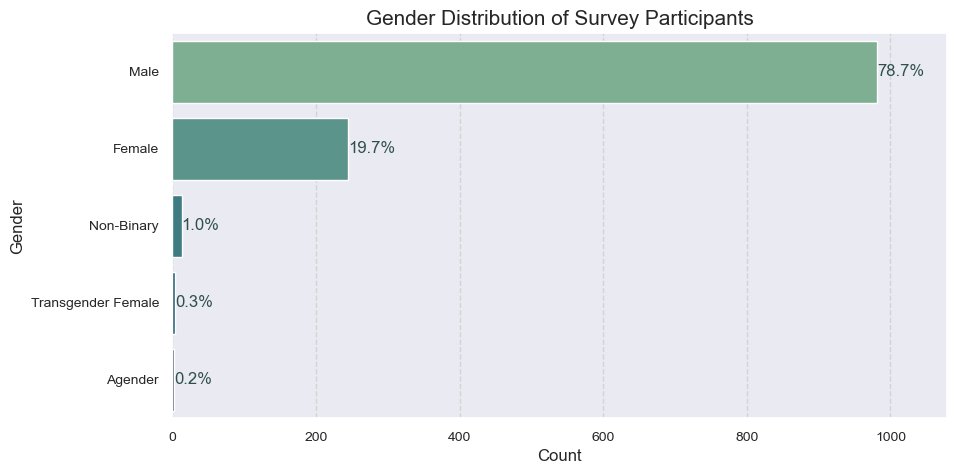

In [74]:
### VISUALIZATION

## gender

gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count'].sum()) * 100

plt.figure(figsize = (12, 5))
sns.set_theme(palette = "pastel")

# font properties
plt.rc('font', size = 12)  # default text size
plt.rc('axes', titlesize = 15)  # title text size
plt.rc('axes', labelsize = 12)  # x and y label size
plt.rc('xtick', labelsize = 10)  # x tick label size
plt.rc('ytick', labelsize = 10)  # y tick label size

# grid
plt.rc('grid', color = 'lightgray', linestyle = '--', linewidth=1)

# bar plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'count', y = 'gender', data = gender_counts, palette = 'crest', orient='h', ax = ax)

# extending x-axis to accomodate for percentage text
max_count = gender_counts['count'].max()
ax.set_xlim(0, max_count + max_count * 0.1)

# naming labels and plot title
ax.set_xlabel('Count')
ax.set_ylabel('Gender')
ax.set_title('Gender Distribution of Survey Participants')

# percentages
for i, row in gender_counts.iterrows():
    ax.text(row['count'] + 0.1, i, f"{row['percentage']:.1f}%", color='darkslategray', va='center')

# displaying final plot
plt.show()

In [81]:
## country

country_counts = df['country'].value_counts()
country_percentages = (country_counts / country_counts.sum()) * 100
country_percentages_formatted = country_percentages.map(lambda x: f"{x:.2f}%")

country_df = pd.DataFrame({'Count': country_counts, 'Percentage': country_percentages_formatted})

country_df

,Count,Percentage
country,,
United States,739,59.31%
United Kingdom,185,14.85%
Canada,72,5.78%
Germany,45,3.61%
Ireland,27,2.17%
Netherlands,27,2.17%
Australia,21,1.69%
France,13,1.04%
India,10,0.80%


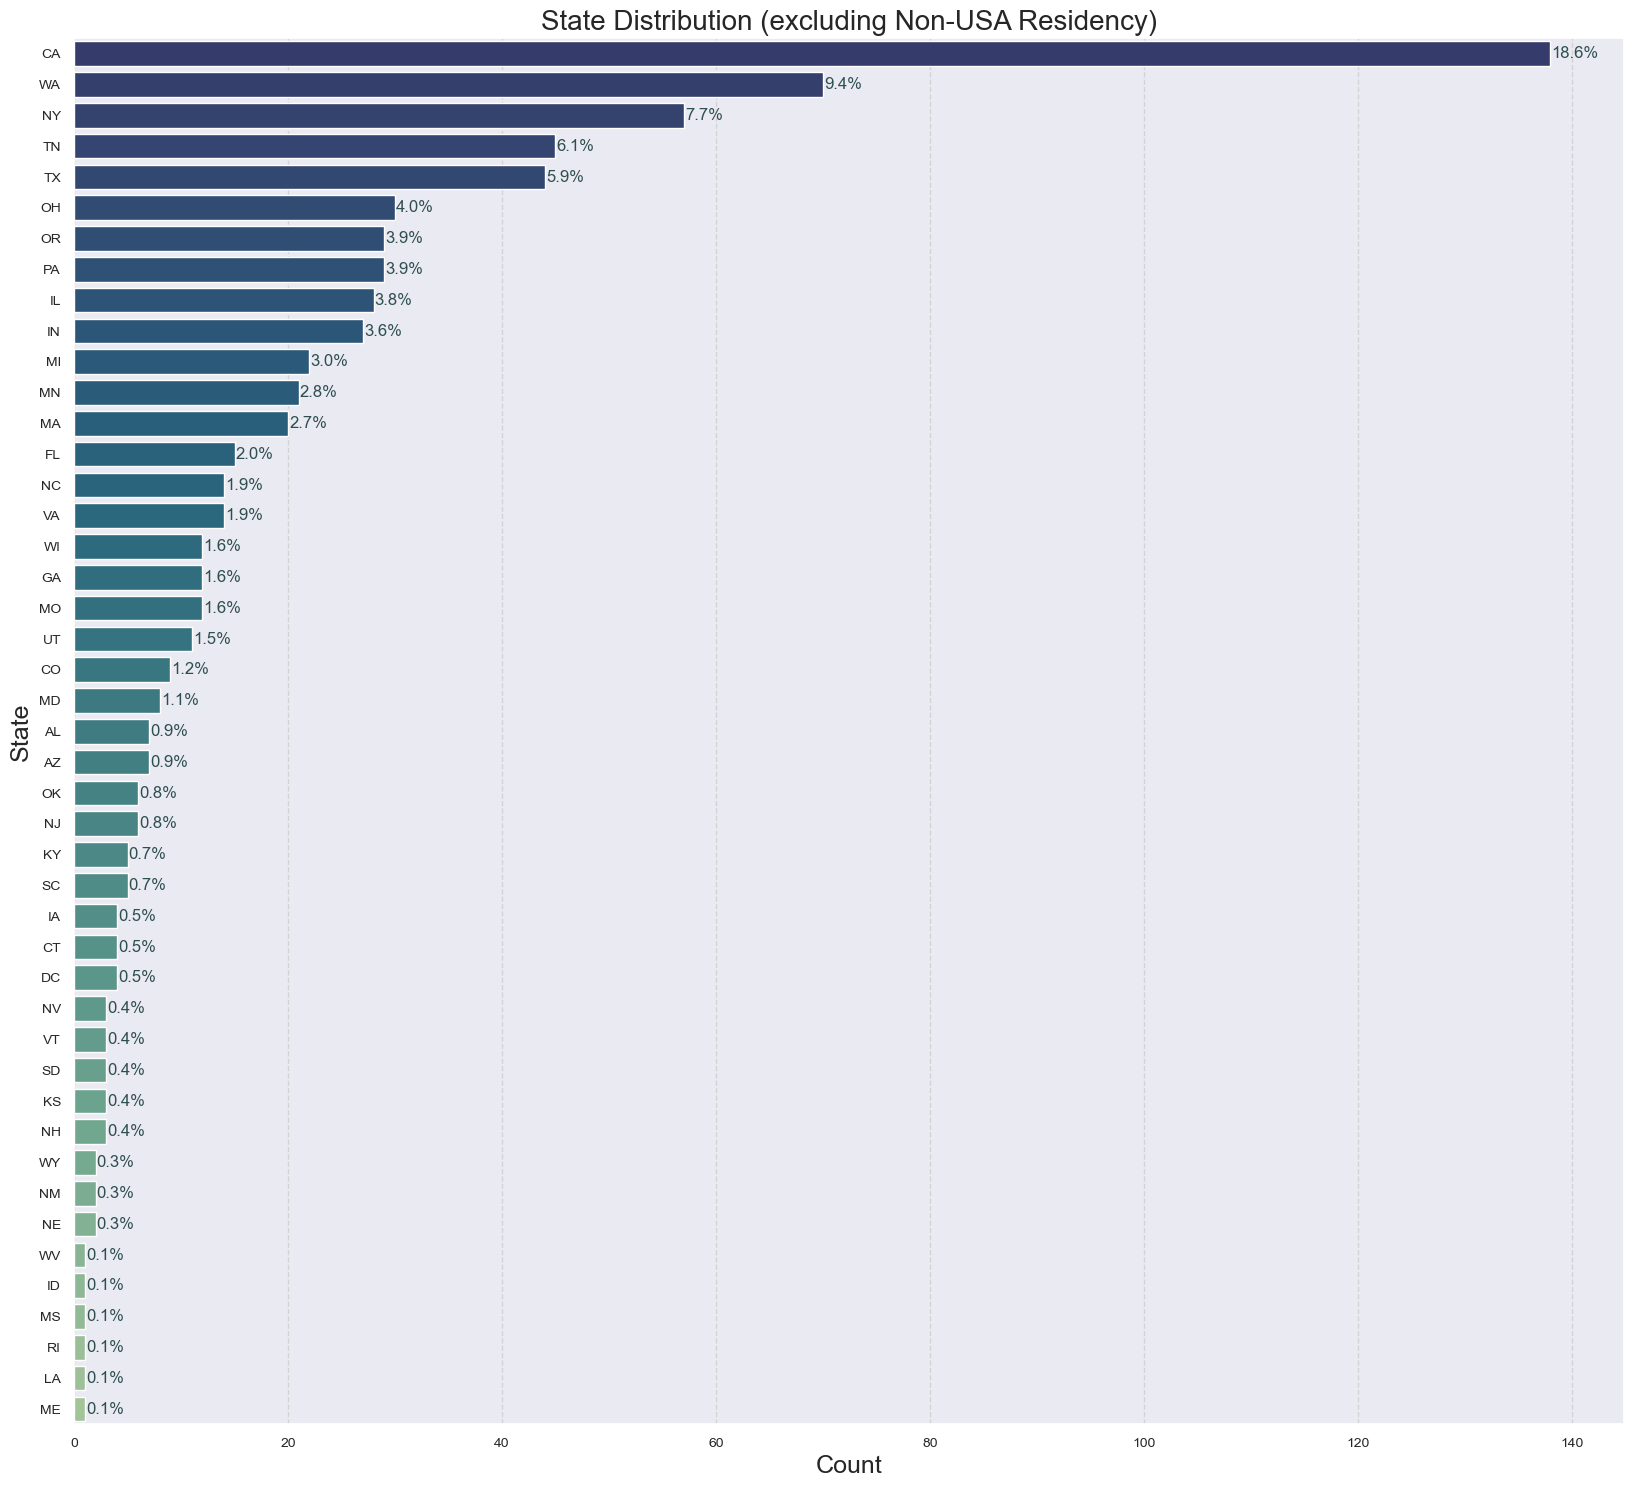

In [102]:
## state

filtered_df = df[df['state'] != 'Non-USA Residency']
state_counts = filtered_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_counts['percentage'] = (state_counts['count'] / state_counts['count'].sum()) * 100

plt.figure(figsize=(20, 18))

# font properties
plt.rc('font', size = 12)  # default text size
plt.rc('axes', titlesize = 20)  # title text size
plt.rc('axes', labelsize = 18)  # x and y label size
plt.rc('xtick', labelsize = 10)  # x tick label size
plt.rc('ytick', labelsize = 10)  # y tick label size

# grid
plt.rc('grid', color='lightgray', linestyle='--', linewidth=1)

# bar plot
sns.countplot(data = filtered_df, y = 'state', order = filtered_df['state'].value_counts().index, palette = 'crest_r')

# percentages
for i, row in state_counts.iterrows():
    plt.text(row['count'] + 0.1, i, f"{row['percentage']:.1f}%", color = 'darkslategray', va = 'center')

# labels and plot title
plt.xlabel('Count')
plt.ylabel('State')
plt.title('State Distribution (excluding Non-USA Residency)')

# displaying the plot
plt.show()

In [104]:
df.columns

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'month', 'year'],
      dtype='object')

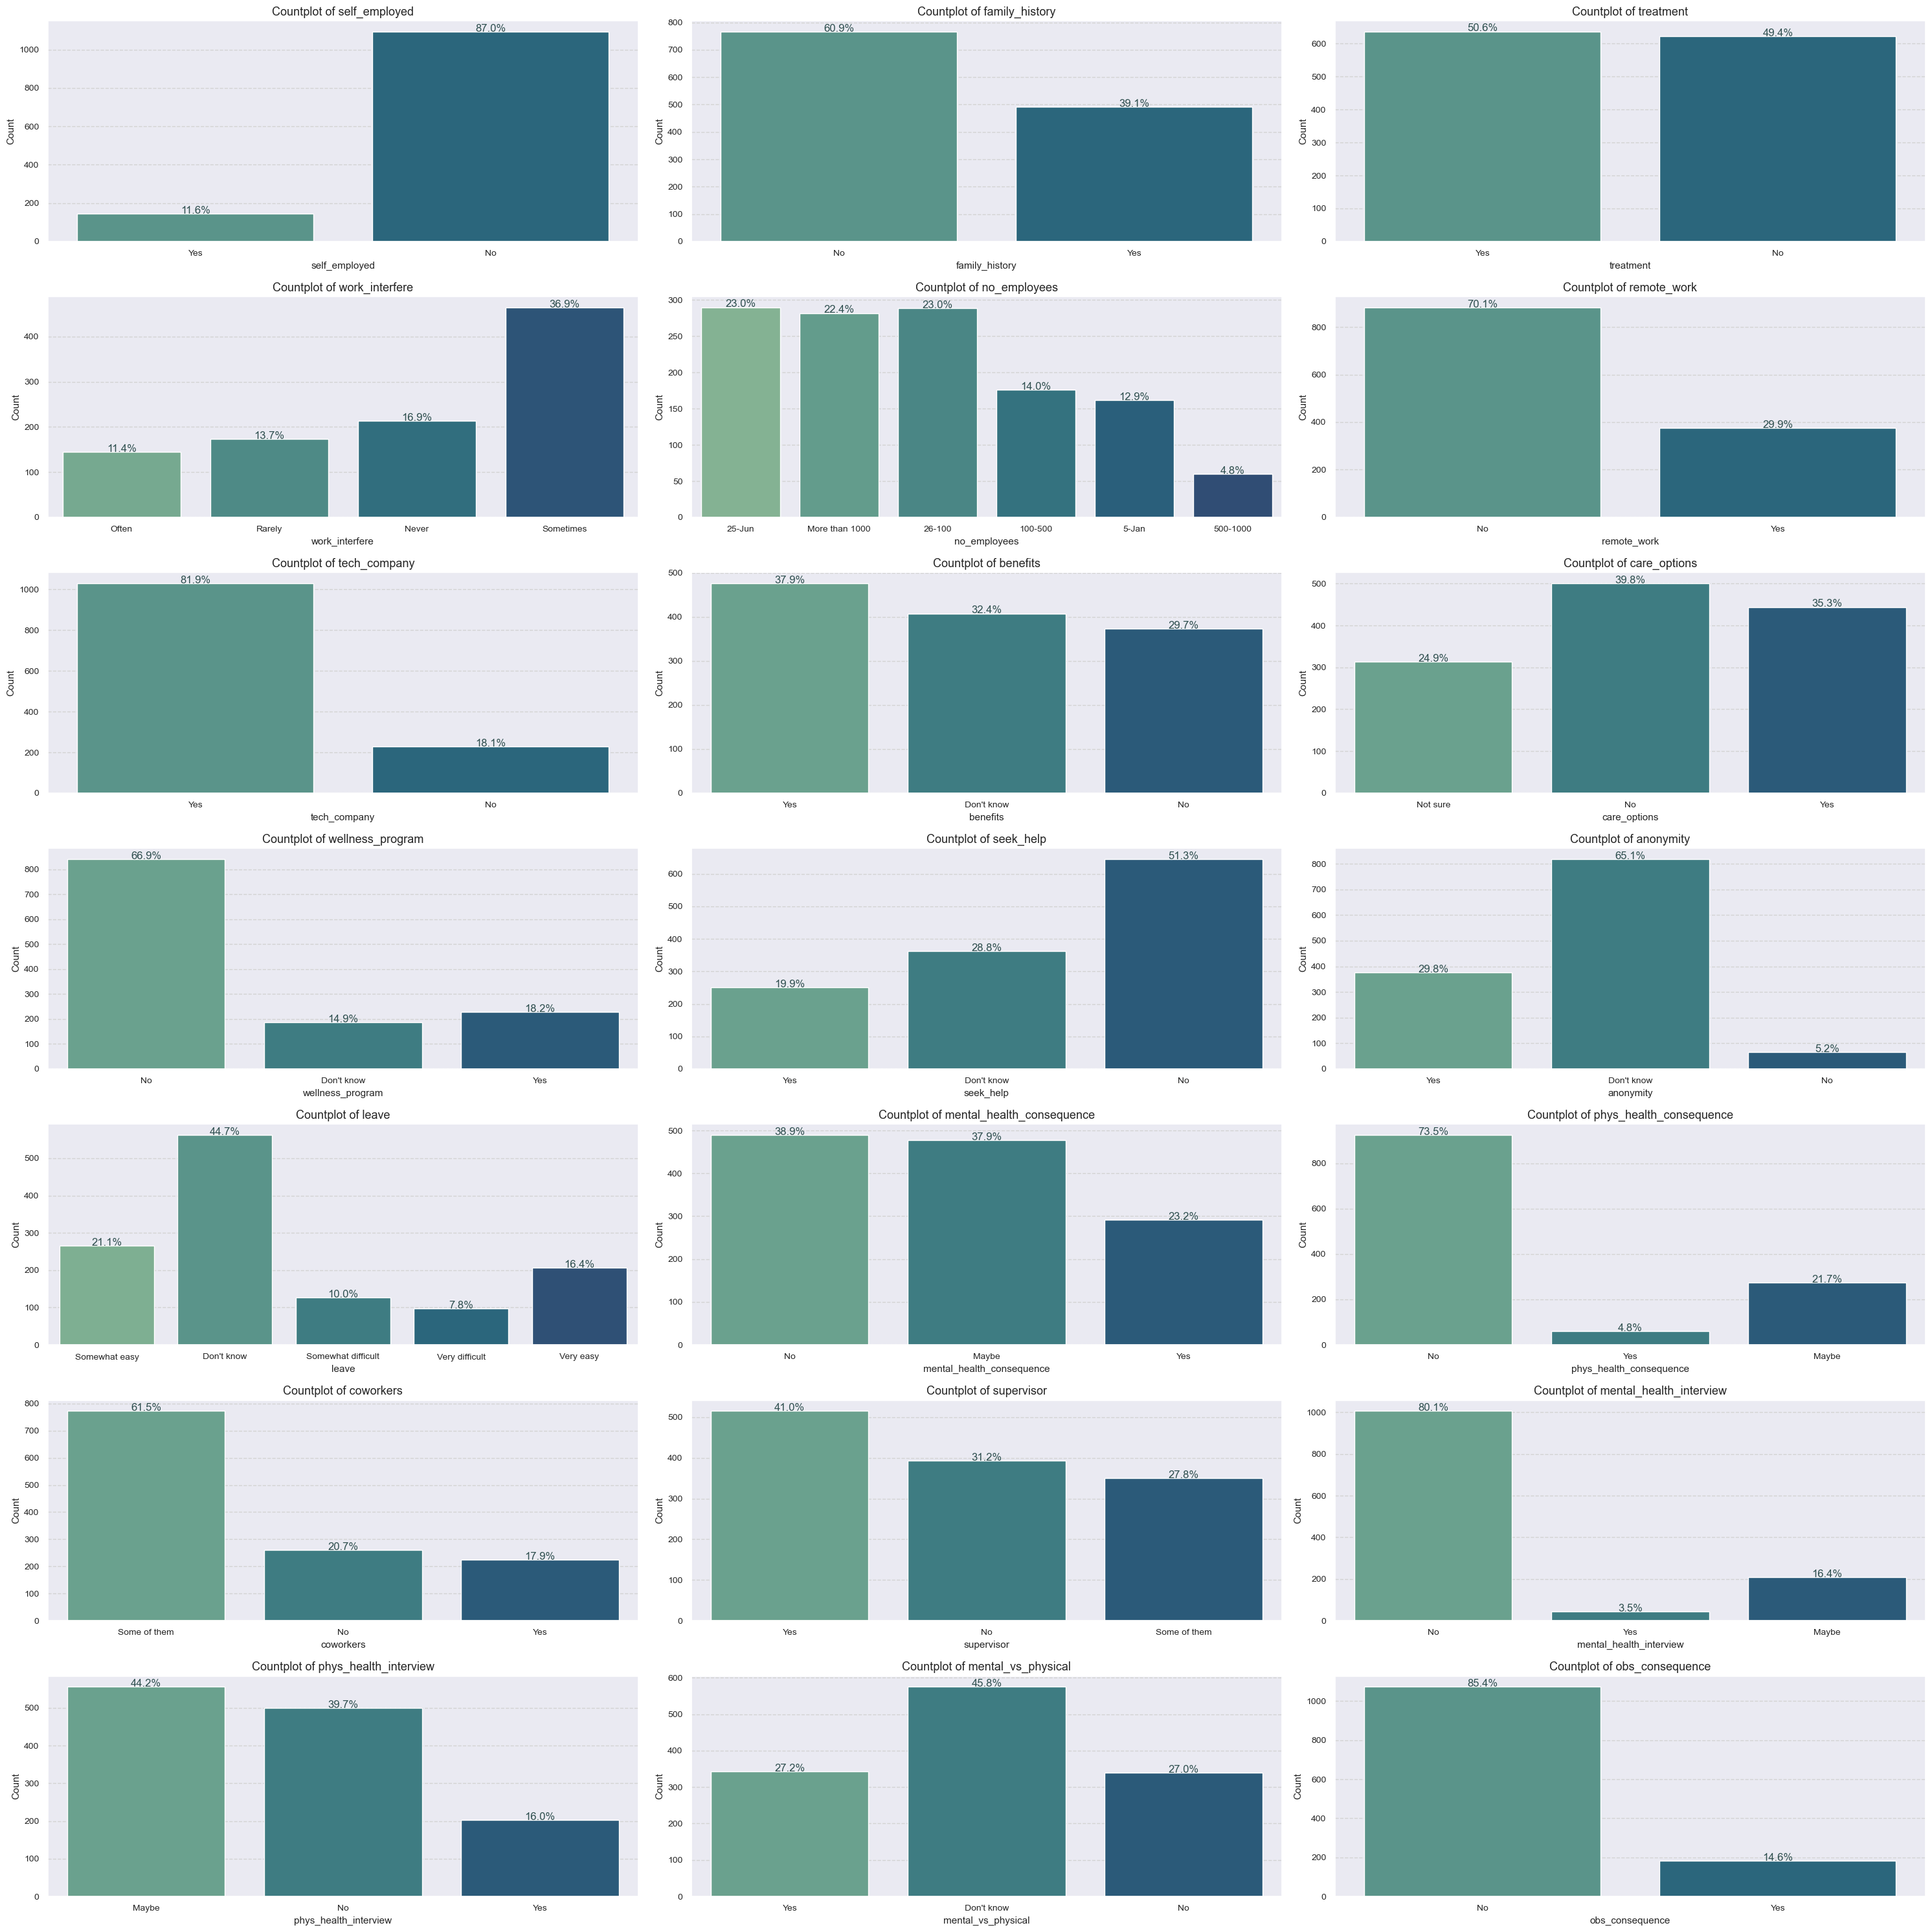

In [149]:
## other feature cols

feature_cols = ['self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work',
                'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
                'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
                'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

plt.figure(figsize=(30, 30))

# Loop over each column and create countplots
for i, col in enumerate(feature_cols, 1):
    plt.subplot(7, 3, i)
    sns.countplot(data=data, x=col, palette='crest')

    # percentages
    total = float(len(data[col]))
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
                 '{0:.1%}'.format(height / total),
                 ha="center", color='darkslategray')

    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks()

plt.tight_layout() 
plt.show()

In [140]:
## age

df_cleaned = df[(df['age'] >= 18) & (df['age'] <= 120)]

print(df_cleaned['age'].describe())

count    1240.000000
mean       32.025806
std         7.244111
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64


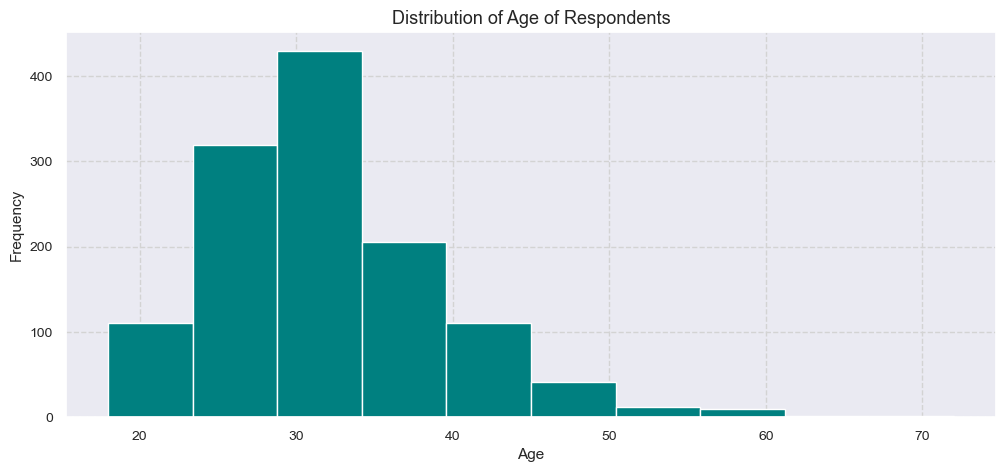

In [146]:
plt.figure(figsize = (12, 5))

plt.rc('axes', titlesize = 13)  # title text size
plt.rc('axes', labelsize = 11)  # x and y label size

plt.hist(df_cleaned['age'], bins = 10, color = 'teal')
plt.title('Distribution of Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

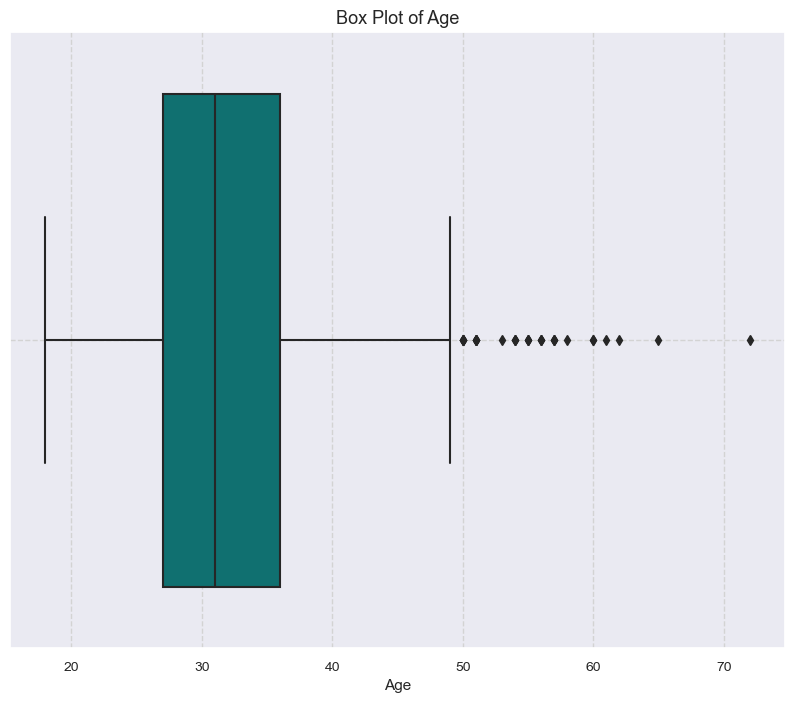

In [147]:
plt.figure(figsize = (12, 5))

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned, x='age', color='teal')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [150]:
df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,year
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,August,2014
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,August,2014
2,32,Male,Canada,Non-USA Residency,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,August,2014
3,31,Male,United Kingdom,Non-USA Residency,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,August,2014
4,31,Male,United States,TX,No,No,No,Never,101-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,August,2014
